In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
%matplotlib inline

In [263]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [264]:
data.shape[0]

25

In [265]:
x=data[:,:3]
x

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [267]:
y=data[:,-1]
y

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

In [256]:
import numpy as np

def mini_batch_adam(x, y, alpha=0.01, batch=5, epochs=100, b1=0.9, b2=0.999, eps=1e-8):
    X = np.concatenate((np.ones(x.shape[0])[:, np.newaxis], x), axis=1)
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)
    m_t = np.zeros(n_features)
    v_t = np.zeros(n_features)
    cost_epoch=[]
    shuffle = np.random.permutation(n_samples)
    X = X[shuffle]
    y = y[shuffle]
    for epoch in range(epochs):
        for i in range(0, n_samples, batch):
            X_batch = X[i:i+batch]
            y_batch = y[i:i+batch]
            y_pred = np.dot(X_batch, theta)
            error = y_pred - y_batch
            cost = np.sum(error ** 2) / (2 * batch)
            d_theta = np.dot(X_batch.T, error) / batch
            m_t = b1 * m_t + (1 - b1) * d_theta
            v_t = b2 * v_t + (1 - b2) * (d_theta ** 2)
            m_t_hat = m_t / (1 - b1 ** (i+1))
            v_t_hat = v_t / (1 - b2 ** (i+1))
            theta -= ((alpha * m_t_hat) / (np.sqrt(v_t_hat)) + eps)
        cost_epoch.append(cost)
        if epoch > 0:
            if  np.linalg.norm(d_theta)<.001 or abs(cost_epoch[-1] - cost_epoch[-2]) < 0.001:
                y_pred = np.dot(X, theta)
                break
            y_pred = np.dot(X, theta)
    print("Epochs: ",epoch+1,'\n')
    print("Grgint victor: ",d_theta,'\n')
    print("y_predict: ",y_pred,"\n")
    print("y: ",y)
    print("Accuracy: ",r2_score(y,y_pred),"\n")
    plt.plot(cost_epoch,".b-")
    plt.xlabel("Epocs", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()

Epochs:  52 

Grgint victor:  [ 0.13913233  9.81356258  1.10467267 -6.68299697] 

y_predict:  [141.01397312 141.00800132 155.10588656 156.44851599 187.3447072
 110.13277719 159.82001907 173.24375276 181.97059413 198.08861016
 172.57265289 160.48138516 149.07443244 165.86021605 191.36993843
 104.08132936 188.0112208  184.65626514 173.91887768 153.7690974
 149.05915654 148.40277134 177.95077348 143.02783396 179.28187145] 

y:  [141. 142. 149. 152. 192. 115. 164. 175. 180. 196. 175. 159. 148. 175.
 192. 101. 184. 185. 177. 152. 147. 149. 183. 141. 177.]
Accuracy:  0.978152806243367 



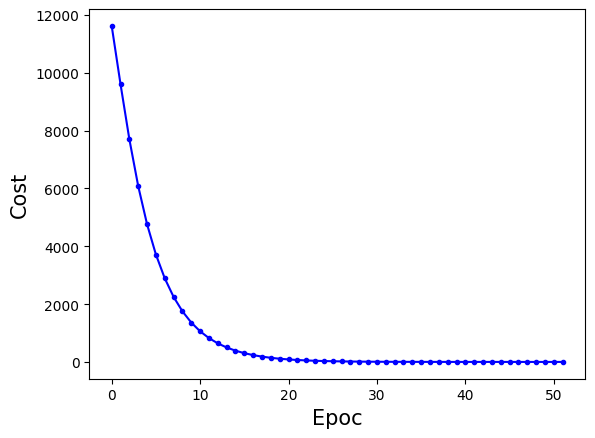

In [280]:
mini_batch_adam(x, y, alpha=0.01, batch=5, epochs=1000, b1=0.9, b2=0.999, eps=1e-8)